In [1]:
import sympy as sm
import numpy as np
from sympy import re, im, I, E, symbols
from scipy.stats import norm
from matplotlib import pyplot as plt
i, n, x, y= sm.symbols('i, n, x, y')
f= sm.Sum(i**10,(i, 1, n-1))
sol= f.doit()
print(f'f= {f}')
display(f)
display(sol)


f= Sum(i**10, (i, 1, n - 1))


Sum(i**10, (i, 1, n - 1))

n**11/11 - n**10/2 + 5*n**9/6 - n**7 + n**5 - n**3/2 + 5*n/66

In [2]:
test=sm.euler(-(x+1)**2-(y+1)**2)

In [3]:
testx=test.diff(x)
testy=test.diff(y)
testx,testy

((-2*x - 2)*Subs(Derivative(euler(_xi_1), _xi_1), _xi_1, -(x + 1)**2 - (y + 1)**2),
 (-2*y - 2)*Subs(Derivative(euler(_xi_1), _xi_1), _xi_1, -(x + 1)**2 - (y + 1)**2))

In [4]:
testy.expand()

-2*y*Subs(Derivative(euler(_xi_1), _xi_1), _xi_1, -x**2 - 2*x - y**2 - 2*y - 2) - 2*Subs(Derivative(euler(_xi_1), _xi_1), _xi_1, -x**2 - 2*x - y**2 - 2*y - 2)

In [5]:
testxy=test.diff(y)
testxy.expand()

-2*y*Subs(Derivative(euler(_xi_1), _xi_1), _xi_1, -x**2 - 2*x - y**2 - 2*y - 2) - 2*Subs(Derivative(euler(_xi_1), _xi_1), _xi_1, -x**2 - 2*x - y**2 - 2*y - 2)

In [6]:
eqx=sm.Eq(testx,0)
eqy=sm.Eq(testy,0)
eqx,eqy

(Eq((-2*x - 2)*Subs(Derivative(euler(_xi_1), _xi_1), _xi_1, -(x + 1)**2 - (y + 1)**2), 0),
 Eq((-2*y - 2)*Subs(Derivative(euler(_xi_1), _xi_1), _xi_1, -(x + 1)**2 - (y + 1)**2), 0))

In [7]:
sol=sm.solve([eqx,eqy],x,y,
            dict=True,
            #simplify=True
            )
sol

[{x: -1, y: -1}]

In [8]:
def f(x): 
    y= sm.exp(-x**2 /2) / sm.sqrt(2*π) 
    return y 
 

def F(x): 
    t= sm.symbols('t') 
    y= f(t).integrate((t, -sm.oo, x)) 
    return y
π= sm.symbols('π') 
f(x), F(x) 

(sqrt(2)*exp(-x**2/2)/(2*sqrt(π)),
 sqrt(pi)*erf(sqrt(2)*x/2)/(2*sqrt(π)) + sqrt(pi)/(2*sqrt(π)))

In [9]:
def ϕ(x): 
    y= sm.exp(-(x**2)/2) /sm.sqrt(2*π) 
    return y 
 

def f(x, μ=0, σ=1): 
    y= ϕ((x-μ)/σ) / σ 
    return y 
 

x, μ= sm.symbols('x, μ') 
σ=    sm.symbols('σ', positive=True)

In [10]:
# E[X]= 
E_X= ( 
    (x*f(x,μ,σ)) 
    .integrate( 
        (x,-sm.oo,sm.oo)) 
).simplify() 
 

# E[X**2]= 
E_XX= ( 
    ((x**2)*f(x,μ,σ)) 
    .integrate( 
        (x,-sm.oo,sm.oo)) 
).simplify() 
 

# Var[X]= 
Var_X= ( 
    (((x-μ)**2)*f(x,μ,σ)) 
    .integrate( 
        (x,-sm.oo,sm.oo)) 
).simplify() 
 

# Mode[X]=  
Mode_X= ( 
    sm.solve( 
        f(x,μ,σ).diff(x), 
        x) 
) 
 

display(E_X) 
display(E_XX) 
display(Var_X) 
display(Mode_X) 

sqrt(pi)*μ/sqrt(π)

sqrt(pi)*(μ**2 + σ**2)/sqrt(π)

sqrt(pi)*σ**2/sqrt(π)

[μ]

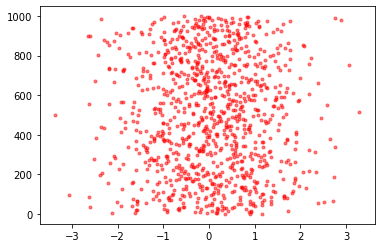

In [11]:
sampleSize= 1000
t= np.arange(sampleSize) 
X= np.random.normal(size= sampleSize)
plt.plot(X,t,'r.',alpha=.5) 

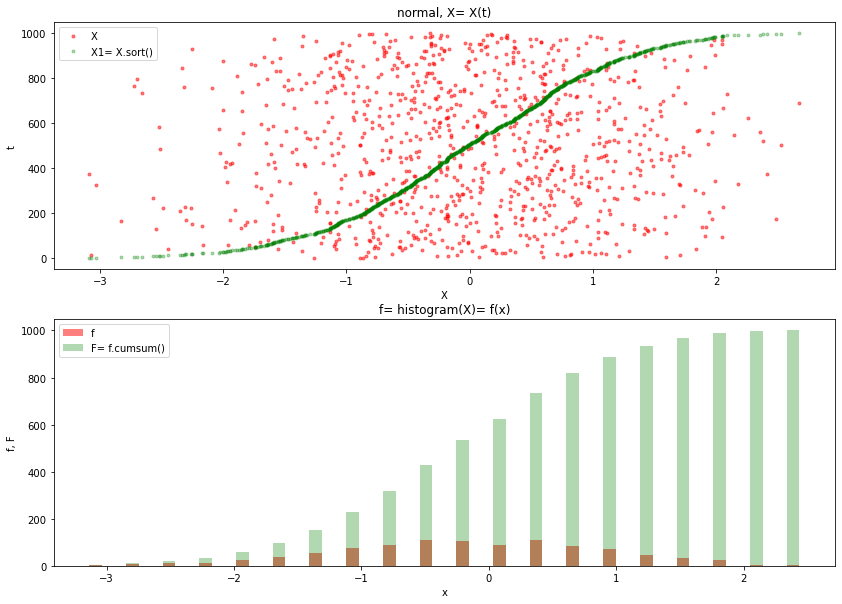

In [12]:
sampleSize= 1000
t= np.arange(sampleSize)
X= np.random.normal(size= sampleSize)
fig,ax = plt.subplots(2, 1,figsize=(14,10)) 
ax[0].plot(X,t,'r.',alpha=.5) 

X1= X.copy() 
X1.sort() 
ax[0].plot(X1,t,'g.',alpha=.3) 

ax[0].set_xlabel('X') 
ax[0].set_ylabel('t') 
ax[0].legend(['X','X1= X.sort()']) 
ax[0].set_title(f'normal, X= X(t)') 


f, x= np.histogram(X, bins=20) 
x= x[:-1] # 原本的 x 比 f 多 1 點，故在此把它弄掉 

ax[1].bar(x, f, width= .1, color='r', alpha=.5) 

F= f.cumsum() 
ax[1].bar(x, F, width= .1, color= 'g', alpha=.3) 

ax[1].set_xlabel('x') 
ax[1].set_ylabel('f, F') 
ax[1].legend(['f','F= f.cumsum()']) 
ax[1].set_title('f= histogram(X)= f(x)') 


plt.show()

In [13]:
np.mean(X),np.var(X)

(-0.012067171713182397, 1.043200187396175)

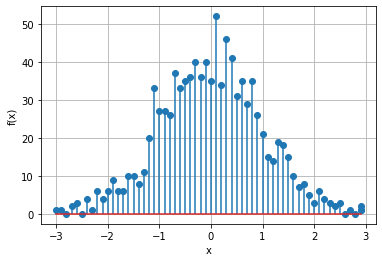

In [15]:
X=np.random.normal(size=1000)
X_sort=np.sort(X)
plt.figure()
dx=.1
xrange=np.arange(-3,3,dx)
ff=[]
t=X_sort[(X_sort<-3)].size
s=X_sort[(X_sort>3)].size
ff += [(x,t)]
ff += [(x,s)]
for x in xrange:    
    q=X_sort[(X_sort>=x)&(X_sort<x+dx)].size
    ff += [(x,q)]
ff=np.array(ff)
xx=ff[:,0]
yy=ff[:,1]
#plt.plot(xx,yy)
plt.stem(xx,yy)
plt.xlabel('x') 
plt.ylabel('f(x)')
plt.grid()